In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [16]:
from model.Schedulers.CosineScheduler import CosineScheduler
from data.data import get_data
from model.Unet import Unet
from model.DDPM import DDPM

In [17]:
LR = 1e-4
WD = 1e-5
BATCH_SIZE = 64
EPOCHS = 10
IMAGE_SIZE = 28

In [18]:
dataset = get_data(BATCH_SIZE)

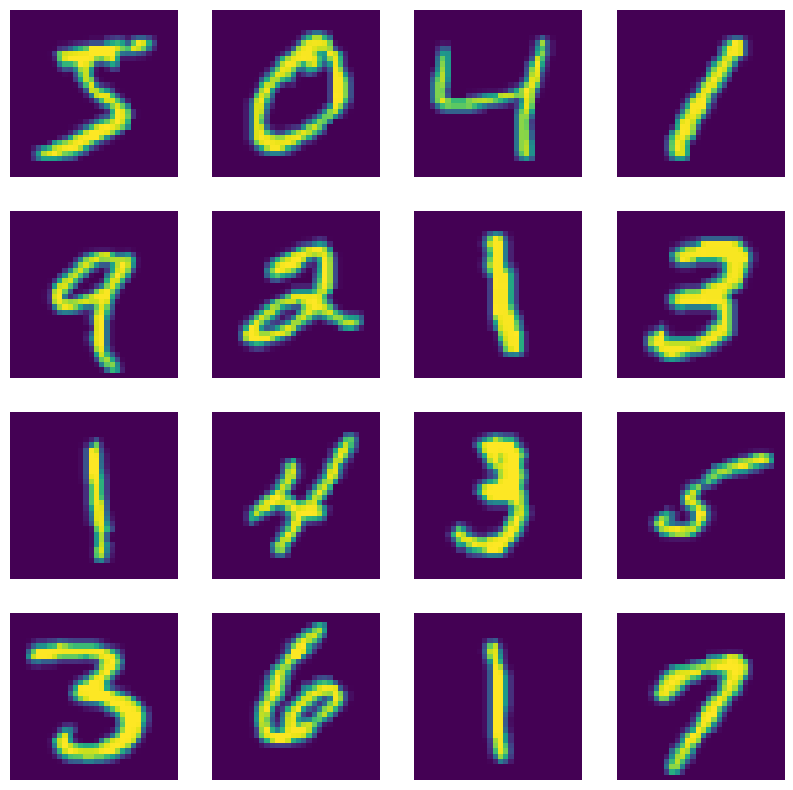

In [19]:
images = next(iter(dataset))
plt.figure(figsize=(10, 10))

for i in range(16):
    
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    
plt.show()

In [21]:
unet = Unet()
ddpm = DDPM(unet, BATCH_SIZE)
sdlr = CosineScheduler
loss_fn = MeanSquaredError()
optimizer = Adam(learning_rate=LR, weight_decay=WD)
ddpm.compile(optimizer = optimizer, loss_fn = loss_fn)

In [ ]:
history = ddpm.fit(
    dataset,
    epochs=EPOCHS,
)

tf.Tensor(0.0012924713, shape=(), dtype=float32)


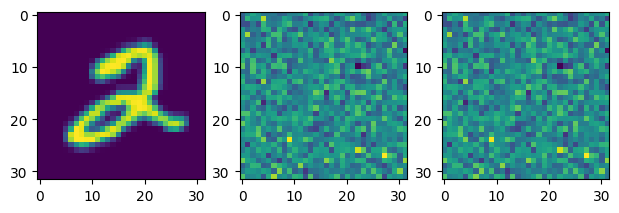

In [70]:
X = next(iter(dataset))
check = X[5]

check = tf.reshape(X[5], shape=(1, 32, 32, 1))

noise = tf.random.normal([check.shape[0], check.shape[1], check.shape[2], check.shape[3]])
times = tf.random.uniform(shape=(check.shape[0],), minval=0, maxval=1000, dtype=tf.int32)
noisy_images = sdlr.forward(check, noise, times)

noise_predict = unet(noisy_images, times)

plt.figure(figsize=(10, 10))

plt.subplot(4, 4, 1)
plt.imshow(check[0])

plt.subplot(4, 4, 2)
plt.imshow(noise[0])

plt.subplot(4, 4, 3)
plt.imshow(noise_predict[0])

loss = loss_fn(noise[0], noise_predict[0])
print(loss)

plt.show()

In [72]:
xt = tf.random.normal([1, 32, 32, 1])

for i in range(999, 0, -1):
    
    time_batch = tf.reshape(tf.constant(i), shape=(1,))
    
    noise_pred = unet(xt, time_batch)
    xt, x0 = sdlr.backward(xt, noise_pred, time_batch)

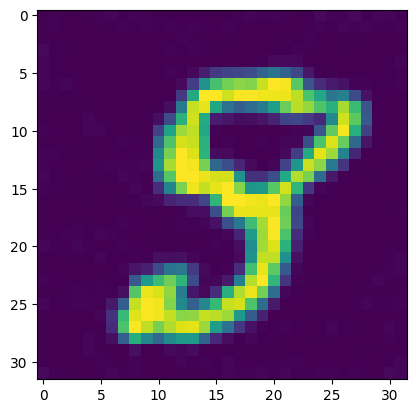

In [73]:
xt = tf.clip_by_value(xt, clip_value_min=-1.0, clip_value_max=1.0)
plt.imshow(xt[0])